[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Number of words removed (appearing in ≥80% of summaries): 23


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.322


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

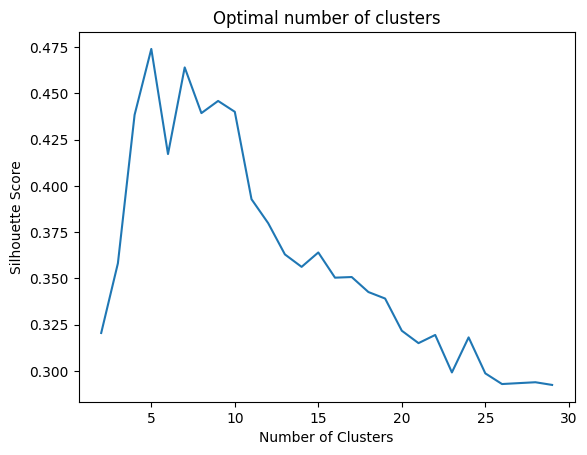

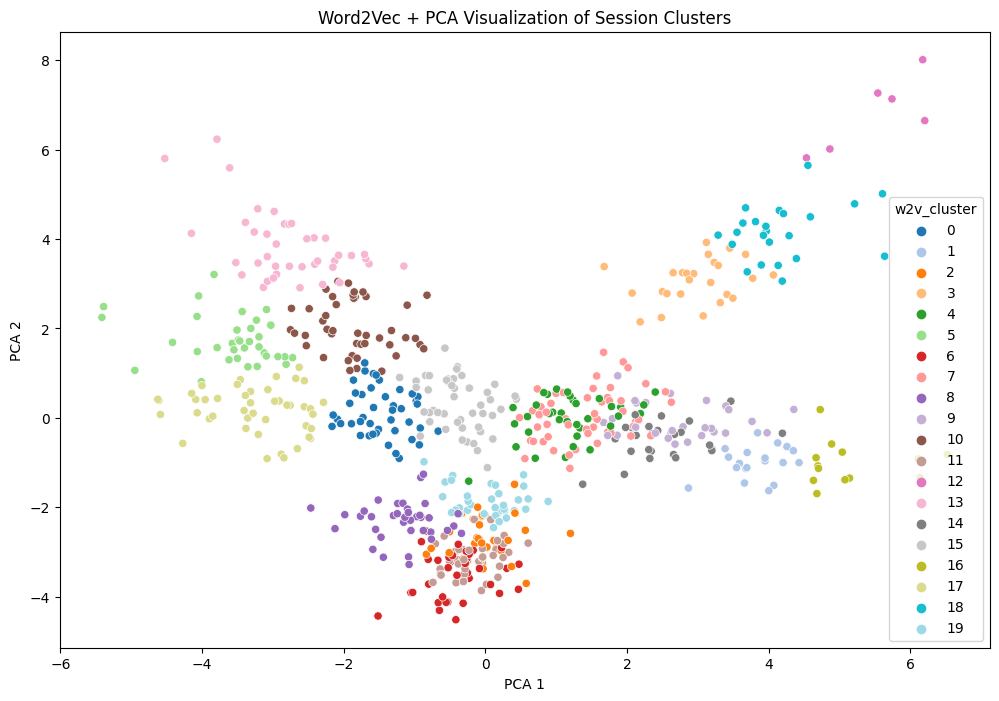


Cluster 0 (43 summaries):
[ 18  31  35  48  73  87  96 107 117 136 142 144 164 185 190 204 216 233
 248 249 275 309 316 321 325 327 329 367 372 396 402 437 489 493 497 501
 511 553 565 606 615 651 661]

Cluster 1 (20 summaries):
[ 52  71 146 151 181 221 231 245 255 258 274 296 313 326 338 548 552 573
 596 598]

Cluster 2 (33 summaries):
[ 33  50  77  83  95 105 109 119 138 149 167 219 223 241 273 297 354 356
 358 394 409 426 431 496 520 526 546 578 612 618 628 645 656]

Cluster 3 (25 summaries):
[ 34  37  46  57  91 115 154 165 168 187 242 254 288 299 335 346 373 452
 459 462 488 510 591 595 610]

Cluster 4 (35 summaries):
[ 14  19  22  32 110 121 126 127 131 145 159 210 215 257 263 269 290 324
 337 406 416 440 464 483 499 504 561 564 583 588 594 601 622 634 666]

Cluster 5 (35 summaries):
[ 13  23  44  47  51  78 153 156 166 169 176 194 218 222 260 282 292 304
 319 330 333 341 351 353 363 366 418 429 443 463 492 508 541 658 668]

Cluster 6 (38 summaries):
[ 11  99 100 158 174 208 209

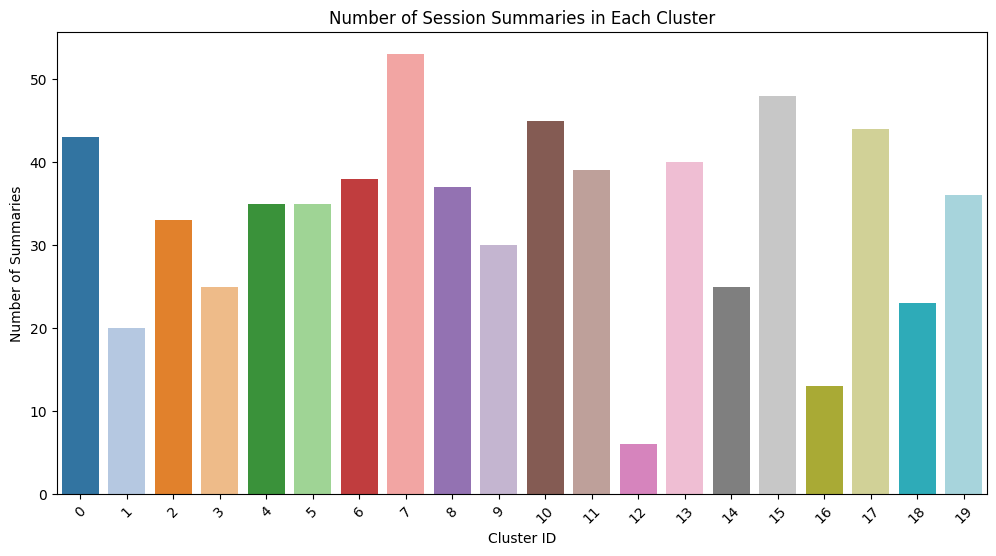


Summaries in Cluster 0 (Total: 43) — Sorted by Similarity:
Serial No: 606.0, Similarity: 0.9967
Serial No: 367.0, Similarity: 0.9964
Serial No: 136.0, Similarity: 0.9949
Serial No: 489.0, Similarity: 0.9947
Serial No: 497.0, Similarity: 0.9946
Serial No: 142.0, Similarity: 0.9930
Serial No: 216.0, Similarity: 0.9927
Serial No: 329.0, Similarity: 0.9923
Serial No: 661.0, Similarity: 0.9921
Serial No: 87.0, Similarity: 0.9907
Serial No: 107.0, Similarity: 0.9907
Serial No: 651.0, Similarity: 0.9905
Serial No: 327.0, Similarity: 0.9904
Serial No: 565.0, Similarity: 0.9890
Serial No: 190.0, Similarity: 0.9890
Serial No: 437.0, Similarity: 0.9872
Serial No: 396.0, Similarity: 0.9866
Serial No: 96.0, Similarity: 0.9860
Serial No: 35.0, Similarity: 0.9858
Serial No: 553.0, Similarity: 0.9858
Serial No: 164.0, Similarity: 0.9855
Serial No: 511.0, Similarity: 0.9850
Serial No: 117.0, Similarity: 0.9832
Serial No: 275.0, Similarity: 0.9824
Serial No: 402.0, Similarity: 0.9821
Serial No: 309.0, 

In [34]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics import silhouette_score
from collections import defaultdict
from collections import Counter
import joblib

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

NUM_OF_CLUSTERS = 20

# ------------------------
# 1. Load Data
# ------------------------
df = pd.read_csv("/kaggle/input/project/DS203_data.csv", encoding='ISO-8859-1')
df = df.dropna(subset=['Session_Summary'])

# ------------------------
# 2. Preprocessing
# ------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

df['tokens'] = df['Session_Summary'].apply(clean_text)

# ------------------------
# 3. Remove high-frequency words (appearing in >=80% of summaries)
# ------------------------
# Count in how many summaries each word appears
summary_counts = Counter()

for tokens in df['tokens']:
    unique_tokens = set(tokens)
    summary_counts.update(unique_tokens)

# Threshold: words appearing in >=80% of summaries
threshold = 0.3 * len(df)
common_words = set([word for word, count in summary_counts.items() if count >= threshold])

print(f"\nNumber of words removed (appearing in ≥80% of summaries): {len(common_words)}")

# Remove those words from tokens
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in common_words])

# ------------------------
# 4. Train Word2Vec Model (CBOW)
# ------------------------
w2v_model = Word2Vec(sentences=df['filtered_tokens'], vector_size=300, window=300, min_count=2, sg=0, workers=4, seed=42)

# ------------------------
# 5. Average Word Vectors for Each Summary
# ------------------------
def get_avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

df['vector'] = df['filtered_tokens'].apply(lambda x: get_avg_vector(x, w2v_model))
X_w2v = np.vstack(df['vector'].values)

# ------------------------
# 6. KMeans Clustering (25 sessions)
# ------------------------
kmeans = KMeans(n_clusters=NUM_OF_CLUSTERS, random_state=42)
df['w2v_cluster'] = kmeans.fit_predict(X_w2v)

# Silhouette Score
sil_score = silhouette_score(X_w2v, df['w2v_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

# Silhouette scores for various K
scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_w2v)
    score = silhouette_score(X_w2v, labels)
    scores.append(score)

plt.plot(range(2, 30), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal number of clusters")
plt.show()

# ------------------------
# 7. Visualize using PCA
# ------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_w2v)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['w2v_cluster'], palette='tab20', legend='full')
plt.title("Word2Vec + PCA Visualization of Session Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# ------------------------
# 8. Group Serial Numbers by Cluster
# ------------------------
cluster_groups = defaultdict(list)

for idx, row in df.iterrows():
    cluster_id = row['w2v_cluster']
    serial_no = row['SerialNo']
    cluster_groups[cluster_id].append(serial_no)

# Convert to list of arrays
session_clusters = [np.array(cluster_groups[i]) for i in range(NUM_OF_CLUSTERS)]

# Display grouped arrays
for i, cluster in enumerate(session_clusters):
    print(f"\nCluster {i} ({len(cluster)} summaries):")
    print(cluster)

# ------------------------
# 9. Plot frequency of sessions in each cluster
# ------------------------
cluster_counts = df['w2v_cluster'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab20')
plt.title("Number of Session Summaries in Each Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Summaries")
plt.xticks(rotation=45)
plt.show()

# ------------------------
# 10. Compute Global Word2Vec Vector for Each Cluster
# ------------------------

# Compute average vector for each cluster
global_cluster_vectors = {
    cluster_id: np.mean(X_w2v[df['w2v_cluster'] == cluster_id], axis=0)
    for cluster_id in range(NUM_OF_CLUSTERS)
}

# Dictionary to hold global vectors for each cluster
from scipy.spatial.distance import cosine

# Dictionary to store ordered summaries by similarity for each cluster
ordered_summaries_by_similarity = {}

for cluster_id in range(NUM_OF_CLUSTERS):
    # Get global vector for the cluster
    global_vector = global_cluster_vectors[cluster_id]
    
    # Get all summaries in this cluster
    cluster_df = df[df['w2v_cluster'] == cluster_id][['SerialNo', 'vector']]
    
    # Compute cosine similarity between each summary's vector and the global vector
    cluster_df['similarity'] = cluster_df['vector'].apply(lambda vec: 1 - cosine(vec, global_vector) if np.linalg.norm(vec) != 0 and np.linalg.norm(global_vector) != 0 else 0)
    
    # Sort by decreasing similarity
    cluster_df = cluster_df.sort_values(by='similarity', ascending=False)
    
    # Store ordered SerialNos and similarity for this cluster
    ordered_summaries_by_similarity[cluster_id] = cluster_df[['SerialNo', 'similarity']].values.tolist()
    
    # Print all summaries for this cluster
    print(f"\nSummaries in Cluster {cluster_id} (Total: {len(cluster_df)}) — Sorted by Similarity:")
    for serial, sim in ordered_summaries_by_similarity[cluster_id]:
        print(f"Serial No: {serial}, Similarity: {sim:.4f}")

In [35]:
from scipy.spatial.distance import cosine

# Cluster to work with
target_cluster_id = 0

# Get summaries in Cluster 0
cluster_df = df[df['w2v_cluster'] == target_cluster_id][['SerialNo', 'filtered_tokens', 'vector']]

for idx, row in cluster_df.iterrows():
    serial_no = row['SerialNo']
    tokens = row['filtered_tokens']
    summary_vector = row['vector']
    
    word_similarities = []
    
    # Use set(tokens) to avoid duplicate words
    for word in set(tokens):
        if word in w2v_model.wv:
            word_vector = w2v_model.wv[word]
            similarity = 1 - cosine(word_vector, summary_vector) if np.linalg.norm(word_vector) != 0 and np.linalg.norm(summary_vector) != 0 else 0
            word_similarities.append((word, similarity))
    
    # Sort words by decreasing similarity
    word_similarities.sort(key=lambda x: x[1], reverse=True)
    
    # Print results for this summary
    print(f"\nSummary Serial No: {serial_no} — Top words by similarity to its own averaged vector:")
    for word, sim in word_similarities:
        print(f"{word}: {sim:.4f}")


Summary Serial No: 18 — Top words by similarity to its own averaged vector:
judging: 0.9874
toolpack: 0.9572
whether: 0.9444
follow: 0.9350
theory: 0.9214
due: 0.9189
later: 0.9097
hold: 0.8974
regarding: 0.8740
good: 0.8686
excel: 0.8632
square: 0.8526
u: 0.8517
upon: 0.8494
distribution: 0.8422
random: 0.8396
learnt: 0.8385
unknown: 0.8249
coefficient: 0.8213
r: 0.8192
line: 0.8181
firstly: 0.8160
session: 0.8090
determination: 0.7992
calculate: 0.7936
histogram: 0.7913
sir: 0.7821
simple: 0.7667
understood: 0.7614
derivation: 0.7598
totally: 0.7362
correlation: 0.7235
prediction: 0.7071
started: 0.6880
turn: 0.6854
emphasized: 0.6758
constraint: 0.6559
hand: 0.6453
behavior: 0.6289
exactly: 0.6060
end: 0.5958
point: 0.5837
characteristic: 0.5837
beyond: 0.5816
dependent: 0.5576
case: 0.5465
definition: 0.5447
eventually: 0.5434
noise: 0.4948
briefly: 0.4800
x: 0.4758
true: 0.3977
teaching: 0.3884
supposed: 0.3290

Summary Serial No: 31 — Top words by similarity to its own averaged 

In [36]:
from collections import defaultdict, Counter
from scipy.spatial.distance import cosine

# Number of clusters
num_clusters = NUM_OF_CLUSTERS

# Store top keywords and detailed scores for each cluster
cluster_keywords = []              # just the word list
cluster_keyword_scores = []        # list of (word, score, avg_cosine, norm_freq)

# Loop through all clusters
for cluster_id in range(num_clusters):
    cluster_df = df[df['w2v_cluster'] == cluster_id][['SerialNo', 'filtered_tokens', 'vector']]
    n_summaries = len(cluster_df)

    word_freq = Counter()
    word_cosine_sum = defaultdict(float)

    for idx, row in cluster_df.iterrows():
        tokens = row['filtered_tokens']
        summary_vector = row['vector']

        for word in set(tokens):
            if word in w2v_model.wv:
                word_vector = w2v_model.wv[word]
                if np.linalg.norm(word_vector) != 0 and np.linalg.norm(summary_vector) != 0:
                    similarity = 1 - cosine(word_vector, summary_vector)
                    word_freq[word] += 1
                    word_cosine_sum[word] += similarity

    word_scores = []
    for word in word_freq:
        avg_cosine = word_cosine_sum[word] / word_freq[word]
        norm_freq = word_freq[word] / n_summaries
        score = avg_cosine * norm_freq
        word_scores.append((word, score, avg_cosine, norm_freq))

    # Identify the maximum score in the cluster
    max_score = max(word_scores, key=lambda x: x[1])[1]

    # Get keywords with scores >= 50% of the maximum score
    filtered_keywords = [word for word in word_scores if word[1] >= 0.5 * max_score]

    cluster_keywords.append([word for word, _, _, _ in filtered_keywords])
    cluster_keyword_scores.append(filtered_keywords)

# Print results with scores
for cluster_id, keyword_data in enumerate(cluster_keyword_scores):
    print(f"\nCluster {cluster_id} — Keywords with score >= 50% of the maximum score:")
    
    for word, score, avg_cosine, norm_freq in keyword_data:
        print(f"{word}: Score = {score:.4f} (Avg Cosine: {avg_cosine:.4f}, Normalized Freq: {norm_freq:.4f})")


Cluster 0 — Keywords with score >= 50% of the maximum score:
distribution: Score = 0.2902 (Avg Cosine: 0.7799, Normalized Freq: 0.3721)
line: Score = 0.2631 (Avg Cosine: 0.8080, Normalized Freq: 0.3256)
r: Score = 0.3374 (Avg Cosine: 0.8060, Normalized Freq: 0.4186)
good: Score = 0.2693 (Avg Cosine: 0.8907, Normalized Freq: 0.3023)
square: Score = 0.3454 (Avg Cosine: 0.8251, Normalized Freq: 0.4186)
python: Score = 0.4210 (Avg Cosine: 0.9528, Normalized Freq: 0.4419)
learned: Score = 0.3101 (Avg Cosine: 0.9524, Normalized Freq: 0.3256)
test: Score = 0.4923 (Avg Cosine: 0.8467, Normalized Freq: 0.5814)
split: Score = 0.3947 (Avg Cosine: 0.9429, Normalized Freq: 0.4186)
adjusted: Score = 0.4705 (Avg Cosine: 0.9196, Normalized Freq: 0.5116)
degree: Score = 0.3130 (Avg Cosine: 0.7918, Normalized Freq: 0.3953)
train: Score = 0.3170 (Avg Cosine: 0.9088, Normalized Freq: 0.3488)
freedom: Score = 0.3650 (Avg Cosine: 0.9233, Normalized Freq: 0.3953)
population: Score = 0.2471 (Avg Cosine: 0.70

In [37]:
# Save after building
# joblib.dump(df, "df_with_vectors.pkl")
# joblib.dump(w2v_model, "w2v_model.pkl")
# joblib.dump(global_cluster_vectors, "global_cluster_vectors.pkl")

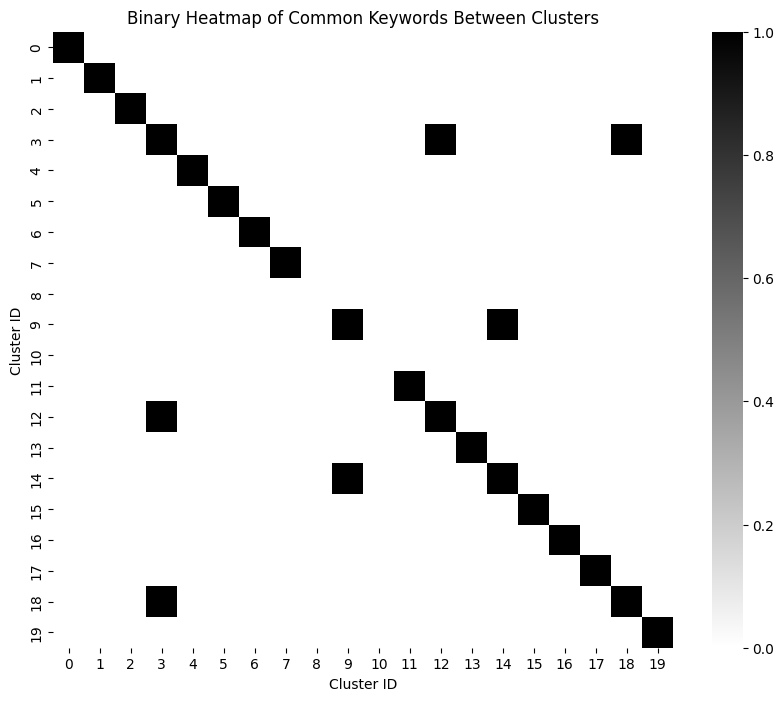

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize an empty matrix to hold the binary values
binary_common_keywords_matrix = np.zeros((num_clusters, num_clusters))

# Loop through all pairs of clusters
for i in range(num_clusters):
    for j in range(i, num_clusters):
        # Find the common keywords between cluster i and cluster j
        common_keywords = set(cluster_keywords[i]) & set(cluster_keywords[j])
        # If the number of common keywords is greater than 8, set it to 1 (black), else 0 (white)
        common_count = len(common_keywords)
        if common_count > 10:
            binary_common_keywords_matrix[i, j] = 1
            binary_common_keywords_matrix[j, i] = 1

# Plot the binary heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(binary_common_keywords_matrix, annot=False, cmap="binary", xticklabels=range(num_clusters), yticklabels=range(num_clusters))
plt.title("Binary Heatmap of Common Keywords Between Clusters")
plt.xlabel("Cluster ID")
plt.ylabel("Cluster ID")
plt.show()

In [40]:
from collections import defaultdict

# Step 0: Recompute same_session_clusters from cluster_keywords
same_session_clusters = []
for i in range(num_clusters):
    for j in range(i + 1, num_clusters):  # Avoid self-pairing
        common_keywords = set(cluster_keywords[i]) & set(cluster_keywords[j])
        if len(common_keywords) > 10:
            same_session_clusters.append((i, j, len(common_keywords)))

# Step 1: Build graph of cluster connections from same_session_clusters
graph = defaultdict(list)
for i, j, _ in same_session_clusters:
    graph[i].append(j)
    graph[j].append(i)

# Step 2: DFS to find connected components (i.e., groups to be merged)
visited = set()
merged_cluster_groups = []

def dfs(node, group):
    visited.add(node)
    group.append(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(neighbor, group)

for node in range(num_clusters):
    if node not in visited:
        group = []
        dfs(node, group)
        merged_cluster_groups.append(group)

# Step 3: Merge keywords based on groups
merged_keywords_set = set()
new_cluster_keywords = []

for group in merged_cluster_groups:
    merged_keywords = []
    for cluster_id in group:
        merged_keywords.extend(cluster_keywords[cluster_id])
        merged_keywords_set.add(cluster_id)
    merged_keywords = list(set(merged_keywords))  # Remove duplicates
    new_cluster_keywords.append(merged_keywords)

# Step 4: Add clusters that were not merged
for cluster_id in range(num_clusters):
    if cluster_id not in merged_keywords_set:
        new_cluster_keywords.append(cluster_keywords[cluster_id])

# Step 5: Print result with keywords
print(f"\n✅ New number of clusters after automatic merging: {len(new_cluster_keywords)}\n")

for cluster_id, keywords in enumerate(new_cluster_keywords):
    print(f"Cluster {cluster_id}: {len(keywords)} keywords")
    print(", ".join(keywords))  # All keywords in one line
    print("-" * 80)


✅ New number of clusters after automatic merging: 17

Cluster 0: 20 keywords
training, test, split, adjusted, distribution, testing, line, degree, python, r, train, good, square, freedom, learned, solution, matrix, closed, form, population
--------------------------------------------------------------------------------
Cluster 1: 17 keywords
integer, problem, hot, red, target, categorical, frequency, next, example, label, column, binary, blue, binning, encoding, category, project
--------------------------------------------------------------------------------
Cluster 2: 25 keywords
curse, question, dimensionality, selection, disease, heart, problem, dataset, factor, column, eda, plot, outlier, midsem, session, variance, vif, complexity, inflation, drop, correlation, exam, exploratory, discussion, missing
--------------------------------------------------------------------------------
Cluster 3: 23 keywords
grade, forest, height, discrete, ordinal, classification, clustering, x, learni

In [41]:
print(f"\nNew number of clusters after automatic merging: {len(new_cluster_keywords)}\n")

for cluster_id, keywords in enumerate(new_cluster_keywords):
    print(f"Cluster {cluster_id}: {len(keywords)} keywords")
    print(", ".join(keywords))  # Print all keywords in a single line
    print("-" * 80)  # Separator for readability


New number of clusters after automatic merging: 17

Cluster 0: 20 keywords
training, test, split, adjusted, distribution, testing, line, degree, python, r, train, good, square, freedom, learned, solution, matrix, closed, form, population
--------------------------------------------------------------------------------
Cluster 1: 17 keywords
integer, problem, hot, red, target, categorical, frequency, next, example, label, column, binary, blue, binning, encoding, category, project
--------------------------------------------------------------------------------
Cluster 2: 25 keywords
curse, question, dimensionality, selection, disease, heart, problem, dataset, factor, column, eda, plot, outlier, midsem, session, variance, vif, complexity, inflation, drop, correlation, exam, exploratory, discussion, missing
--------------------------------------------------------------------------------
Cluster 3: 23 keywords
grade, forest, height, discrete, ordinal, classification, clustering, x, learning

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


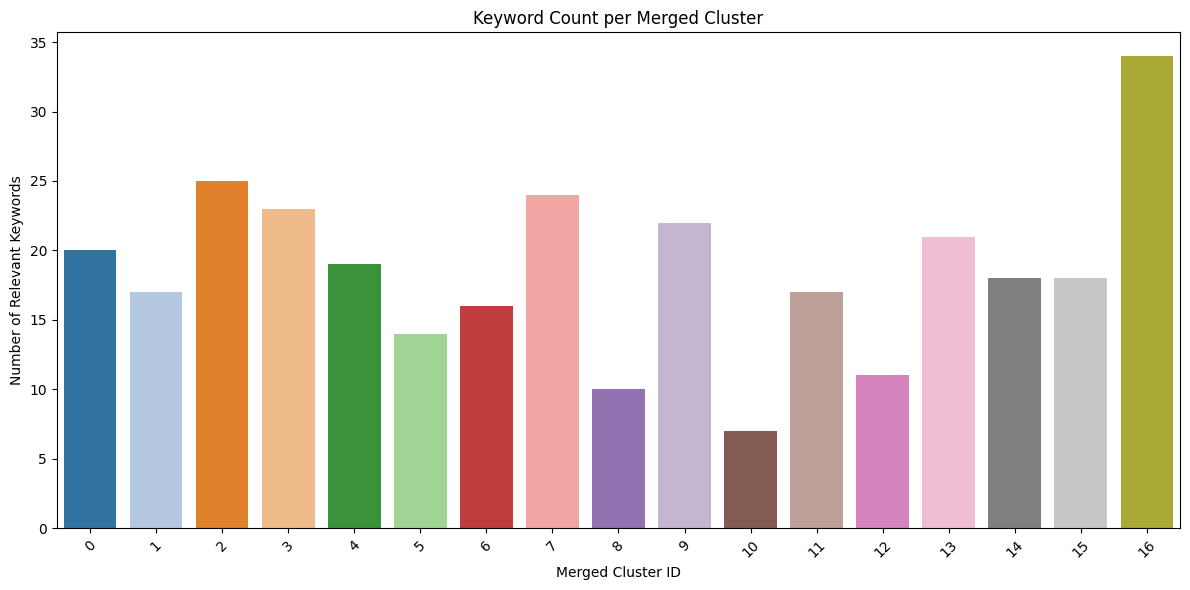

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for new merged clusters
merged_cluster_ids = list(range(len(new_cluster_keywords)))
merged_keyword_counts = [len(keywords) for keywords in new_cluster_keywords]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=merged_cluster_ids, y=merged_keyword_counts, palette='tab20')
plt.xlabel("Merged Cluster ID")
plt.ylabel("Number of Relevant Keywords")
plt.title("Keyword Count per Merged Cluster")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()